In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

import nltk
from ast import literal_eval
from datetime import timedelta
import string
import statistics
import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
# from contractions import CONTRACTION_MAP
import unicodedata

import sys
sys.path.append('../')
import Variables as vr

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# create loader object
L = instaloader.Instaloader()
LIST_ALL_USERS = vr.LIST_ALL_USERS

nltk.download('stopwords')
nltk.download('punkt')


USE_LOCAL_DA = True

if (not USE_LOCAL_DA):
    
    # MongoDB Database
    instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
    instagram_db = instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

else:

    # MongoDB Database
    Local_instagramClient = pymongo.MongoClient('127.0.0.1:27017',authSource='Instagram')
    instagram_db = Local_instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# https://github.com/cjhutto/vaderSentiment#citation-information

# Load impersonator posts

In [4]:
# impersonator
_limit = 10000
df_impersonator =  pd.DataFrame(list(instagram_col_impersonator.find({
            "$or":
            [
                {'similarity_username': { '$gt': 0.15 }},
                {'similarity_full_name': { '$gt': 0.15 }},
                {'similarity_biography': { '$gt': 0.15 }},
                {'similarity_photo' : True },
            ]    
    
}).limit(_limit) ))
df_impersonator.shape[0]

1829

In [5]:
# df_impersonator = pd.read_csv('Dataset/impersonator_list.csv')
# df_impersonator.shape[0]

In [6]:
# post
_limit = 10000
df_post =  pd.DataFrame(list(instagram_col_post.find({}).limit(_limit) ))
df_post.shape[0]

7254

In [7]:
# df_post = pd.read_csv('Dataset/post_data.csv')
# df_post.shape[0]

# get dataframes

In [8]:
# politician
df_post_trump = df_post.loc[( df_post['associated_username'] == vr.DONALD_TRUMP ) ] 
df_post_obama = df_post.loc[( df_post['associated_username'] == vr.BARACK_OBAMA ) ]
df_post_macron = df_post.loc[( df_post['associated_username'] == vr.EMMANUEL_MACRON ) ]
df_post_johnson = df_post.loc[( df_post['associated_username'] == vr.BORIS_JOHNSON ) ]
df_post_may = df_post.loc[( df_post['associated_username'] == vr.THERESA_MAY ) ]

# sport player
df_post_cristiano_ronalod = df_post.loc[( df_post['associated_username'] == vr.CRISTIANO_RONALDO ) ] 
df_post_leo_messi = df_post.loc[( df_post['associated_username'] == vr.LEOMESSI ) ]
df_post_roger_federer = df_post.loc[( df_post['associated_username'] == vr.ROGER_FEDERER ) ]
df_post_rafael_nadal = df_post.loc[( df_post['associated_username'] == vr.RAFAEL_NADAL ) ]
df_post_djokovic = df_post.loc[( df_post['associated_username'] == vr.NOVAK_DJOKOVIC ) ]

#singers
df_post_lady_gaga = df_post.loc[( df_post['associated_username'] == vr.LADY_GAGA )] 
df_post_beyonce = df_post.loc[( df_post['associated_username'] == vr.BEYONCE ) ] 
df_post_taylor_swift = df_post.loc[( df_post['associated_username'] == vr.TAYLOR_SWIFT ) ] 
df_post_adele = df_post.loc[( df_post['associated_username'] == vr.ADELE ) ] 
df_post_madonna = df_post.loc[( df_post['associated_username'] == vr.MADONNA ) ] 

# Calculate mean

In [9]:
list_all_usecases = [
    df_post_trump, df_post_obama, df_post_macron, df_post_johnson, df_post_may,
    df_post_cristiano_ronalod, df_post_leo_messi, df_post_rafael_nadal, df_post_roger_federer, df_post_djokovic,
    df_post_lady_gaga, df_post_beyonce, df_post_taylor_swift, df_post_adele, df_post_madonna,
]

# Dataframe - Communities

In [10]:
# df_politician.columns

In [11]:
df_politician = pd.concat([df_post_trump, df_post_obama, df_post_macron, df_post_johnson, df_post_may])
df_sportplayer = pd.concat([df_post_cristiano_ronalod, df_post_leo_messi, df_post_rafael_nadal, df_post_roger_federer, df_post_djokovic])
df_musician = pd.concat([df_post_lady_gaga, df_post_beyonce, df_post_taylor_swift, df_post_adele, df_post_madonna])

df_politician['community'] = 'politician'
df_sportplayer['community'] = 'sportplayer'
df_musician['community'] = 'musician'


print("politician: " + str(df_politician.shape[0]))
print("sportplayer: " + str(df_sportplayer.shape[0]))
print("musician: " + str(df_musician.shape[0]))

politician: 1058
sportplayer: 2017
musician: 4074


In [12]:
df_all_post = pd.concat([df_politician, df_sportplayer, df_musician])
df_all_post.shape[0]

7149

In [13]:
df_post_politician = df_politician.dropna(subset=['post_caption'])
df_post_sportplayer = df_sportplayer.dropna(subset=['post_caption'])
df_post_musician = df_musician.dropna(subset=['post_caption'])

In [14]:
df_post_politician.columns

Index(['_id', 'associated_hashtag', 'associated_username',
       'post_associated_hashtag', 'post_associated_username', 'post_caption',
       'post_caption_hashtags', 'post_caption_mentions', 'post_comments',
       'post_date_utc', 'post_is_video', 'post_likes', 'post_location',
       'post_mediaid', 'post_owener_external_url',
       'post_owener_profile_pic_url', 'post_owner_biography',
       'post_owner_external_url', 'post_owner_followees',
       'post_owner_followers', 'post_owner_full_name', 'post_owner_id',
       'post_owner_is_private', 'post_owner_is_verified',
       'post_owner_mediacount', 'post_owner_profile_pic_url',
       'post_owner_similarity_biography', 'post_owner_similarity_full_name',
       'post_owner_similarity_photo', 'post_owner_similarity_username',
       'post_owner_username', 'post_shortcode', 'post_tagged_users',
       'post_thumbnail', 'post_typename', 'post_url', 'post_video_url',
       'post_viewer_has_liked', 'community'],
      dtype='objec

In [15]:
from textblob import TextBlob
def analize_sentiment(_text):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(_text)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [16]:
def get_sentiment(_df):
    
    _df = _df.dropna(subset=['post_caption'])
    
    _df['SA'] = _df['post_caption'].map(analize_sentiment)
    
    return _df

tt = get_sentiment(df_post_trump)      
# for usecase in list_all_usecases:
#     print(usecase.iloc[0]['associated_username'])
#     topic_detection(usecase, 10)
#     print("===================================")
#     print("===================================")

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
tt[['post_caption', 'SA']].head()

post_caption  SA
12  Excellent point 😂\nFollow us 👉 @oldgloryglory ...   1
13  😂\nFollow us 👉 @oldgloryglory .\n.\n.\n.\n.\n....   0
14  😂\nFollow us 👉 @oldgloryglory .\n.\n.\n.\n.\n....   0
15  🔥🔥\nFollow us 👉 @oldgloryglory .\n.\n.\n.\n.\n...   0
16  😂😂😂\nFollow us 👉 @oldgloryglory .\n.\n.\n.\n.\...   0

# second method

In [18]:
df_all_post = df_all_post.dropna(subset=['post_caption'])

In [19]:
nlp = spacy.load('en', parse = True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [20]:
def clean_text(_row):
    
    # Load the regular expression library
    import re
    
    text = _row['post_caption']
    
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('\S*@\S*\s?', '', text)  # remove emails
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", "", text)  # remove single quotes

    #emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    text = re.sub('[,\.!?]', '', text)

    # Convert the titles to lowercase
    text = text.lower()

    _row['post_caption_clean'] = text
        
    return _row

df_all_post = df_all_post.apply(clean_text, axis=1)
df_post_politician = df_post_politician.apply(clean_text, axis=1)
df_post_sportplayer = df_post_sportplayer.apply(clean_text, axis=1)
df_post_musician = df_post_musician.apply(clean_text, axis=1)

In [21]:
def remove_stopwords(_row):#, is_lower_case=False):
    
    is_lower_case = True
    text = _row['post_caption_clean']
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    
    _row['post_caption_clean_filtered'] = filtered_text
    return _row

df_all_post = df_all_post.apply(remove_stopwords, axis=1)
df_post_politician = df_post_politician.apply(remove_stopwords, axis=1)
df_post_sportplayer = df_post_sportplayer.apply(remove_stopwords, axis=1)
df_post_musician = df_post_musician.apply(remove_stopwords, axis=1)

In [22]:
# cleaned
corpus = df_all_post['post_caption_clean'].tolist()

# # emoticos
# corpus = df_all_post['post_caption'].tolist()

In [23]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn(emoticons=True)

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([ list(df_all_post['associated_username']), list(df_all_post['community']), sentiment_scores, sentiment_category]).T
df.columns = ['use case', 'community', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df
df.groupby(by=['community']).describe()

sentiment_score                                               
                      count      mean       std   min  25%  50%  75%   max
community                                                                 
musician             3961.0  2.597576  4.829480 -22.0  0.0  1.0  4.0  49.0
politician           1033.0  1.994192  5.710894 -29.0  0.0  0.0  4.0  32.0
sportplayer          1943.0  2.143592  5.191142 -10.0  0.0  0.0  3.0  84.0

In [24]:
df.head()

use case   community  sentiment_score sentiment_category
0  realdonaldtrump  politician              3.0           positive
1  realdonaldtrump  politician              0.0            neutral
2  realdonaldtrump  politician              0.0            neutral
3  realdonaldtrump  politician              0.0            neutral
4  realdonaldtrump  politician              0.0            neutral

In [25]:
df.groupby(by=['use case', 'community']).describe()

sentiment_score                                 \
                                      count      mean       std   min  25%   
use case        community                                                    
Beyonce         musician              234.0  2.089744  4.426372 -14.0  0.0   
adele           musician              355.0  1.515493  3.839530 -13.0  0.0   
barackobama     politician            150.0  4.780000  6.355117 -11.0  0.0   
borisjohnsonuk  politician            130.0  2.084615  5.309104  -9.0  0.0   
cristiano       sportplayer           681.0  1.474302  3.574789 -10.0  0.0   
djokernole      sportplayer           154.0  4.396104  7.841084  -5.0  0.0   
emmanuelmacron  politician             79.0  1.063291  2.690638  -3.0  0.0   
ladygaga        musician              791.0  1.833123  3.245244 -14.0  0.0   
leomessi        sportplayer           738.0  1.663957  4.330740  -9.0  0.0   
madonna         musician              237.0  2.050633  3.717453 -15.0  0.0   
rafaelnadal     sportplayer           229.0  3.401747  6.671831  -5.0  0.0   
realdonaldtrump politician            623.0  1.365971  5.806992 -29.0  0.0   
rogerfederer    sportplayer           141.0  3.382979  7.759473  -6.0  0.0   
taylorswift     musician             2344.0  3.125427  5.439895 -22.0  0.0   
theresamay      politician             51.0  2.686275  4.384017  -2.0  0.0   

                                             
                             50%  75%   max  
use case        community                    
Beyonce         musician     0.0  3.0  26.0  
adele           musician     0.0  3.0  22.0  
barackobama     politician   4.0  8.0  32.0  
borisjohnsonuk  politician   0.0  4.0  24.0  
cristiano       sportplayer  0.0  2.0  29.0  
djokernole      sportplayer  2.0  6.0  80.0  
emmanuelmacron  politician   0.0  2.0  14.0  
ladygaga        musician     0.0  3.0  21.0  
leomessi        sportplayer  0.0  3.0  84.0  
madonna         musician     1.0  3.0  22.0  
rafaelnadal     sportplayer  0.0  4.0  45.0  
realdonaldtrump politician   0.0  4.0  28.0  
rogerfederer    sportplayer  2.0  4.0  74.0  
taylorswift     musician     2.0  4.0  49.0  
theresamay      politician   0.0  4.0  22.0

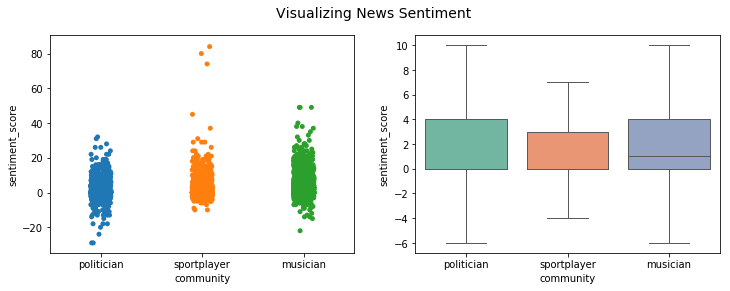

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sp = sns.stripplot(x='community', y="sentiment_score", data=df, ax=ax1)

bp = sns.boxplot(x='community', y="sentiment_score", data=df, palette="Set2", ax=ax2, showfliers=False, linewidth=1,)

# bp.set_yscale('log')

t = f.suptitle('Visualizing News Sentiment', fontsize=14)

No handles with labels found to put in legend.


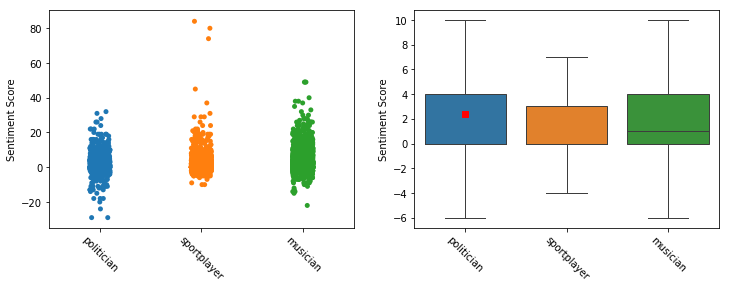

In [27]:
def plot_2():
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))#, sharey=True)

#     color = {NAME_CLUSTER_0: COLOR_C0, NAME_CLUSTER_1: COLOR_C1, NAME_CLUSTER_2:COLOR_C2}
    
    sp = sns.stripplot(x='community', y="sentiment_score",dodge=True, data=df, ax=ax1)
    sp.set_ylabel("Sentiment Score")
    sp.set_xlabel("")
    sp.set_title("")
    sp.xaxis.set_tick_params(rotation=-45)
    

    bp = sns.boxplot(x='community', y="sentiment_score", data=df, ax=ax2, showfliers=False, linewidth=1,)
    bp.plot(df.mean(), 'rs')
    bp.set_ylabel("Sentiment Score")
    bp.set_xlabel("")
    bp.set_title("")
    bp.xaxis.set_tick_params(rotation=-45)
    bp.legend().remove()

    plt.savefig("plot_05post_topic_P2.pdf", bbox_inches='tight')

#     print("Sentiment score for all comment issued by impersonator across communities")
    # t = f.suptitle('Visualizing News Sentiment', fontsize=14)
    
plot_2()

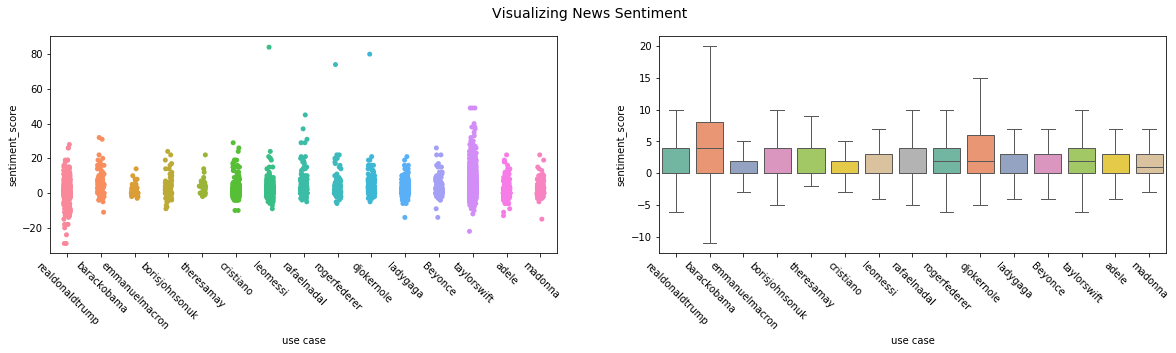

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))

sp = sns.stripplot(x='use case', y="sentiment_score", data=df, ax=ax1)
sp.xaxis.set_tick_params(rotation=-45)

bp = sns.boxplot(x='use case', y="sentiment_score", data=df, palette="Set2", ax=ax2, showfliers=False, linewidth=1,)
bp.xaxis.set_tick_params(rotation=-45)
# bp.set_yscale('log')

t = f.suptitle('Visualizing News Sentiment', fontsize=14)

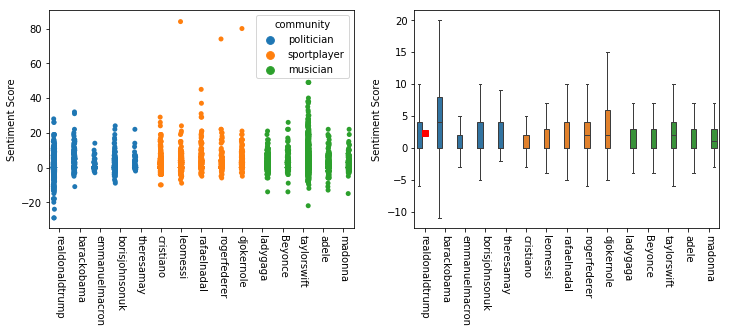

In [29]:
def plot_3():
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))#, sharey=True)

#     color = {NAME_CLUSTER_0: COLOR_C0, NAME_CLUSTER_1: COLOR_C1, NAME_CLUSTER_2:COLOR_C2}
    
    sp = sns.stripplot(x='use case', y="sentiment_score", hue='community', dodge=True, data=df, ax=ax1)
    sp.set_ylabel("Sentiment Score")
    sp.set_xlabel("")
    sp.set_title("")
    sp.xaxis.set_tick_params(rotation=-90)
    

    bp = sns.boxplot(x='use case', y="sentiment_score", hue='community', data=df, ax=ax2, showfliers=False, linewidth=1,)
    bp.plot(df.mean(), 'rs')
    bp.set_ylabel("Sentiment Score")
    bp.set_xlabel("")
    bp.set_title("")
    bp.xaxis.set_tick_params(rotation=-90)
    bp.legend().remove()

    plt.savefig("plot_05post_topic_P3.pdf", bbox_inches='tight')

#     print("Sentiment score for all comment issued by impersonator across communities")
    # t = f.suptitle('Visualizing News Sentiment', fontsize=14)
    
plot_3()

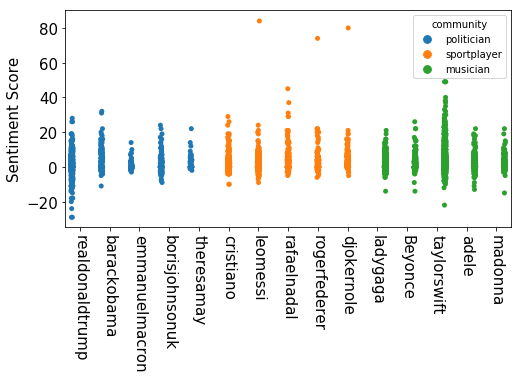

In [30]:
def plot_3_1():
    f, axes = plt.subplots(1, 1, figsize=(8, 4))#, sharey=True)

#     color = {NAME_CLUSTER_0: COLOR_C0, NAME_CLUSTER_1: COLOR_C1, NAME_CLUSTER_2:COLOR_C2}
    
    sp = sns.stripplot(x='use case', y="sentiment_score", hue='community', dodge=True, data=df, ax=axes)
    sp.set_ylabel("Sentiment Score")
    sp.set_xlabel("")
    sp.set_title("")
    sp.xaxis.set_tick_params(rotation=-90)

    #     for ax in axes:
    ax = sp
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)

    plt.savefig("plot_05post_topic_P3_1.pdf", bbox_inches='tight')

#     print("Sentiment score for all comment issued by impersonator across communities")
    # t = f.suptitle('Visualizing News Sentiment', fontsize=14)
    
plot_3_1()

In [31]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

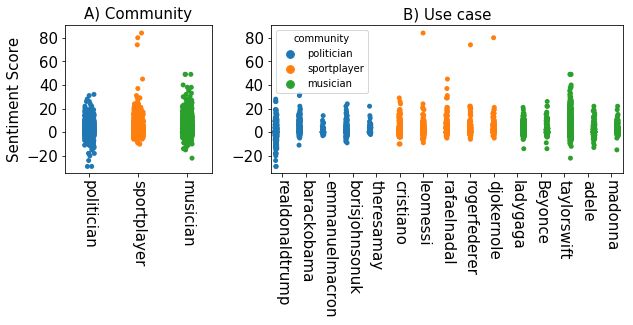

In [32]:
def plot_3_2():
    
    fig = plt.subplots(1, 1, figsize=(10, 6), sharey=True)

    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.2)
    first_plt = plt.subplot(grid[0, 0])
    sec_plt = plt.subplot(grid[0, 1:])



    sp = sns.stripplot(x='community', y="sentiment_score",dodge=True, data=df, ax=first_plt)
    sp.set_ylabel("Sentiment Score")
    sp.set_xlabel("")
    sp.set_title("A) Community")
    sp.xaxis.set_tick_params(rotation=-90)
    ax = sp
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)


    sp = sns.stripplot(x='use case', y="sentiment_score", hue='community', dodge=True, data=df, ax=sec_plt)
    # sp.set_ylabel("Sentiment Score")
    sp.set_ylabel(" ")
    sp.set_xlabel("")
    sp.set_title("B) Use case")
    sp.xaxis.set_tick_params(rotation=-90)
    
    ax = sp
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)

    plt.savefig("plot_05post_topic_P3_2.pdf", bbox_inches='tight')


plot_3_2()

In [33]:
def plot_4():
    
    sns.set(style="whitegrid")
#     sns.set(style="whitegrid")
#     sborn.set(font_scale=1.5)
    
    
#     f, axes = plt.subplots(1, 1, figsize=(5, 4))#, sharey=True)

#     color = {NAME_CLUSTER_0: COLOR_C0, NAME_CLUSTER_1: COLOR_C1, NAME_CLUSTER_2:COLOR_C2}
    
    fc = sns.factorplot(x="community", hue="sentiment_category",
                        data=df, kind="count", 
                        legend=True,
                        palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

    axes = fc.axes.flatten()
    axes[0].set_ylabel("Caption/Post Count")
#     axes[0].set_xlabel("")
    
#     fc.set_title("")
#     axes[0].xaxis.set_tick_params(rotation=-45)
    

#     fc.fig.get_axes()[0].set_yscale('log')
    
    for ax in fc.axes.flat:
        for label in ax.get_yticklabels():
            label.set_fontsize(14)
            
        for label in ax.get_xticklabels():
            label.set_fontsize(14)
    plt.savefig("plot_05post_topic_P4.pdf", bbox_inches='tight')

    # fc.set_yscale('log')
    
plot_4()

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


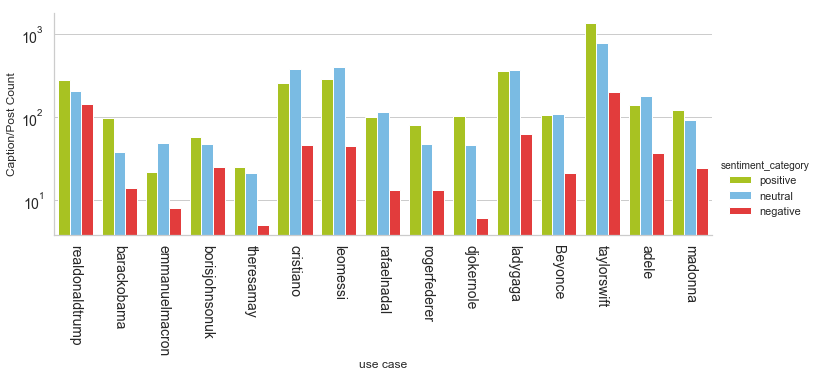

In [34]:
def plot_5():
    
    sns.set(style="whitegrid")
#     sns.set(style="whitegrid")
#     sborn.set(font_scale=1.5)
    
    
#     f, axes = plt.subplots(1, 1, figsize=(5, 4))#, sharey=True)

#     color = {NAME_CLUSTER_0: COLOR_C0, NAME_CLUSTER_1: COLOR_C1, NAME_CLUSTER_2:COLOR_C2}
    
    fc = sns.factorplot(x="use case", 
#                         col="community", 
                        hue="sentiment_category",
                        data=df, kind="count", 
                        legend=True,
                        size=4, aspect=2.5,
                        palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

    axes = fc.axes.flatten()
    axes[0].set_ylabel("Caption/Post Count")
#     axes[0].set_xlabel("")
    
#     fc.set_title("")
    axes[0].xaxis.set_tick_params(rotation=-90)
    

    fc.fig.get_axes()[0].set_yscale('log')
    
    for ax in fc.axes.flat:
        for label in ax.get_yticklabels():
            label.set_fontsize(14)
            
        for label in ax.get_xticklabels():
            label.set_fontsize(14)
    plt.savefig("plot_05post_topic_P5.pdf", bbox_inches='tight')

    # fc.set_yscale('log')
    
plot_5()

In [35]:
df_grouped = df.groupby(['use case', 'sentiment_category', 'community'])['sentiment_score'].size().reset_index(name='counts')
df_grouped.columns

Index(['use case', 'sentiment_category', 'community', 'counts'], dtype='object')

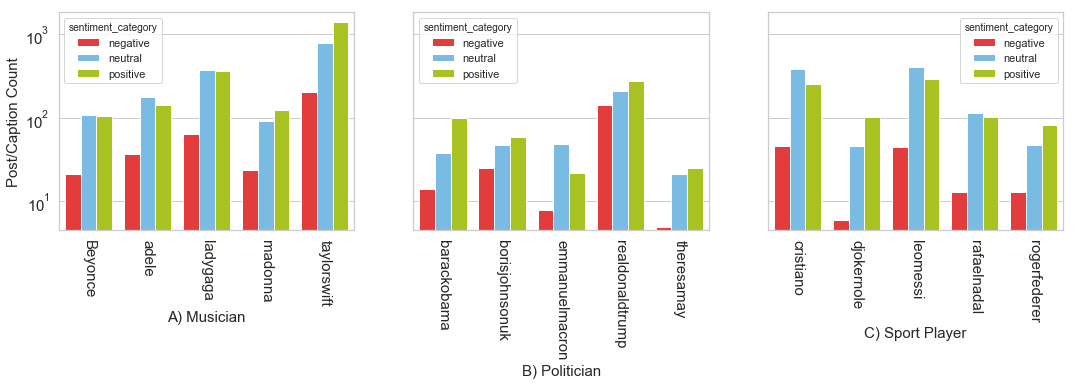

In [36]:
def plot_6():
    
    sns.set(style="whitegrid")
    
    f, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

    counter = 0
    for name, group in df_grouped.groupby('community'):

        ax = sns.barplot(x="use case", 
                         y="counts", 
                         hue='sentiment_category', 
                         data=group, 
                         palette={"negative": "#FE2020", 
                                     "positive": "#BADD07", 
                                     "neutral": "#68BFF5"},
                         ax=axes[counter]
                        )



        ax.set_yscale('log')
        ax.xaxis.set_tick_params(rotation=-90)
        ax.set_xlabel("")
        ax.set_ylabel("")

        counter +=1

    axes[0].set_ylabel("Post/Caption Count")
    axes[0].set_xlabel("A) Musician")
    axes[1].set_xlabel("B) Politician")
    axes[2].set_xlabel("C) Sport Player")

    for ax in axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(15)
            
    plt.savefig("plot_05post_topic_P6.pdf", bbox_inches='tight')
    
plot_6()

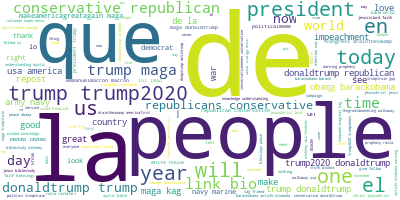

In [37]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_post_politician['post_caption_clean'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

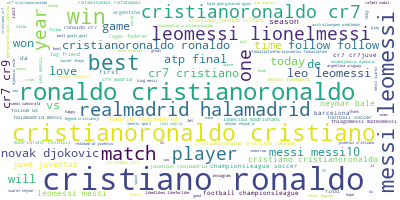

In [38]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_post_sportplayer['post_caption_clean'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

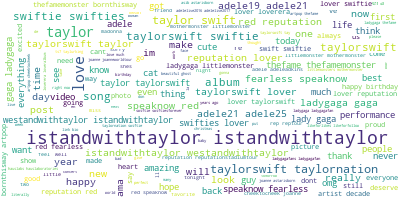

In [39]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_post_musician['post_caption_clean'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Third Method - VADER

In [40]:
# https://github.com/cjhutto/vaderSentiment#citation-information
#https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:
def get_vader_sentiment(_row):
    temp = _row['post_caption']
    _row['vader'] = analyzer.polarity_scores(temp)
    return _row

df_all_post = df_all_post.apply(get_vader_sentiment, axis=1)
df_post_politician = df_post_politician.apply(get_vader_sentiment, axis=1)
df_post_sportplayer = df_post_sportplayer.apply(get_vader_sentiment, axis=1)
df_post_musician = df_post_musician.apply(get_vader_sentiment, axis=1)

In [43]:
df_post_musician[['post_caption', 'vader']].head()

post_caption  \
244  My eyebrows weren’t the only thing I bleached ...   
245  What’s fortnight\nHair: @marcoswigs \nOutfit: ...   
246  Barbarella Psychedella 💫 \nPhoto/edit @lane_wo...   
247  ✞ In the most biblical sense, I am beyond repe...   
248  Pepé Le Pew found skinned alive and wrapped ar...   

                                                 vader  
244  {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...  
245  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
246  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...  
247  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
248  {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...

In [44]:
def get_points(_df):
    
    list_vader = _df['vader'].tolist()
    points = []
    
    for item in list_vader:
        x = item['pos']
        y = item['neu']
        z = item['neg']
        points.append((x,y,z))
        
    return points

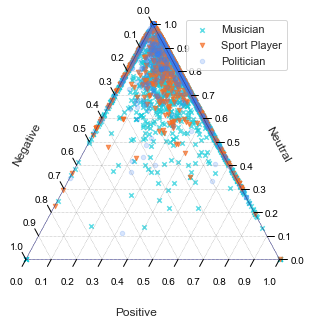

In [45]:
import ternary
import random



scale = 1
fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(5, 5)


# Draw Boundary and Gridlines
tax.boundary(linewidth=0.5, alpha=0.5)
tax.gridlines(color="blue", multiple=5)

# Set Axis labels and Title
fontsize = 12
offset = 0.24

# tax.right_corner_label("X", fontsize=fontsize)
# tax.top_corner_label("Y", fontsize=fontsize)
# tax.left_corner_label("Z", fontsize=fontsize)

tax.left_axis_label("Negative", fontsize=fontsize, offset=offset)
tax.right_axis_label("Neutral", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Positive", fontsize=fontsize, offset=offset)

n_size = 20
["h" , "X" , "v" , "o"]

points = get_points(df_post_musician)
tax.scatter(points, marker='x', s=n_size, color=vr.COLOR_MUSICIAN, label="Musician", alpha=0.7)

points = get_points(df_post_sportplayer)
tax.scatter(points, marker='v', s=n_size, color=vr.COLOR_SPORTSARTS, label="Sport Player", alpha=0.7)

points = get_points(df_post_politician)
tax.scatter(points, marker='o', s=n_size, color=vr.COLOR_POLITICIAN, label="Politician", alpha=0.2)

tax.legend()


# tax.boundary(linewidth=1.0)
tax.gridlines(multiple=0.1, color="gray")
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f", offset=0.03)

tax.get_axes().axis('off')

tax.show()

fig.savefig("plot_05post_topic_P7.pdf", bbox_inches='tight')

In [46]:
df_post_politician['vader'].head()

12    {'neg': 0.038, 'neu': 0.813, 'pos': 0.149, 'co...
13    {'neg': 0.042, 'neu': 0.875, 'pos': 0.083, 'co...
14    {'neg': 0.042, 'neu': 0.875, 'pos': 0.083, 'co...
15    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
16    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: vader, dtype: object

In [47]:
# a = [1,2,3,2,1,5,6,5,5,5]
ll = get_points(df_post_politician)
# list_all = df_post_politician['vader'].head()

import collections
# collections.Counter(ll)

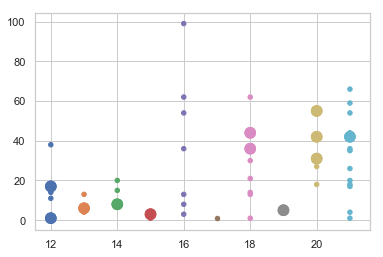

In [48]:
import matplotlib.pyplot as plt

data_dict = {12: [1, 17, 11, 17, 1, 14, 38], 13: [13, 6, 4, 6], 14: [15, 8, 20, 8, 7], 15: [2, 3, 3, 1], 16: [62, 13, 36, 3, 8, 99, 54], 17: [1], 18: [44, 30, 36, 14, 21, 13, 44, 1, 62, 36], 19: [5, 5], 20: [27, 42, 42, 18, 31, 55, 31, 55], 21: [59, 1, 42, 17, 66, 26, 18, 4, 36, 42, 20, 54, 44, 35]}
size_constant = 20

for xe, ye in data_dict.items():
    xAxis = [xe] * len(ye)

    #square it to amplify the effect, if you do ye.count(num)*size_constant the effect is barely noticeable
    sizes = [ye.count(num)**2.5 * size_constant for num in ye]
    plt.scatter(xAxis, ye, s=sizes)

plt.show()

In [49]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
def get_ternary_data(_df, _n_cluster):
    
    Data = get_points(_df) 
    df = DataFrame(Data,columns=['x','y','z'])

    # kmeans
    n_cluster = _n_cluster
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    centroids = kmeans.cluster_centers_

    df['cluster'] = kmeans.labels_


    # cluster df
    df_clusters = pd.DataFrame(kmeans.cluster_centers_)
    df_clusters.columns = ['x', 'y', 'z']

    list_lens = []
    cluster_sizes = df.groupby(['cluster']).size()
    for name, group in df.groupby(['cluster']):
        list_lens.append(group.shape[0])

    df_clusters['size'] = list_lens
    return centroids, df_clusters


[222.46374527221002, 99.61766961273243, 57.28036474181769, 52.92813227773182, 73.63216886455746, 44.41434759052788, 84.08770712186714, 122.47359693584083, 12.841607982273604, 10.361161575920939, 71.71063156909129, 53.686735739968654, 57.28036474181769, 114.36623578022186, 24.699044232642496, 100.95750195095462, 80.59142583872848, 34.67888360813883, 116.364872435084, 52.92813227773182, 29.334143566758883, 96.24688260793674, 10.361161575920939, 84.08770712186714, 101.48356607584574, 73.63216886455746, 68.66226144412576, 60.585060931143545, 53.686735739968654, 26.315860825369402]
[194.62559783738587, 65.94878976758108, 10.361161575920939, 38.21817379385359, 70.71776009424345, 32.10839141175283, 22.99960695723509, 89.3927823540393, 44.41434759052788, 37.0764674952055, 48.90226050956909, 52.15491268741969, 29.334143566758883, 4.827795843250328, 0.0, 42.46077220427027, 66.50524642581276, 38.21817379385359, 29.334143566758883, 40.400104594356996, 26.315860825369402, 55.88069670175416, 1.92181

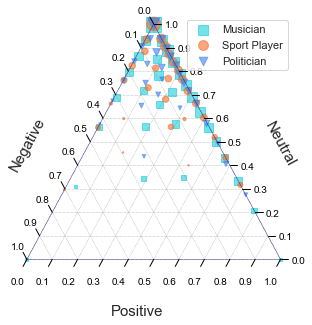

In [51]:
def plot_8():
    scale = 1
    fig, tax = ternary.figure(scale=1.0)
    fig.set_size_inches(5, 5)


    # Draw Boundary and Gridlines
    tax.boundary(linewidth=0.5, alpha=0.5)
    tax.gridlines(color="blue", multiple=5)

    # Set Axis labels and Title
    fontsize = 15
    offset = 0.24
    node_constant = 4

    # tax.right_corner_label("X", fontsize=fontsize)
    # tax.top_corner_label("Y", fontsize=fontsize)
    # tax.left_corner_label("Z", fontsize=fontsize)

    tax.left_axis_label("Negative", fontsize=fontsize, offset=offset)
    tax.right_axis_label("Neutral", fontsize=fontsize, offset=offset)
    tax.bottom_axis_label("Positive", fontsize=fontsize, offset=offset)

    n_size = 5
    ["h" , "X" , "v" , "o"]

    cluster_size = 30

    centroids_clusters, df_data_clusters = get_ternary_data(df_post_musician, cluster_size)
    sizes = [math.log(num)**2 * node_constant for num in df_data_clusters['size']]
    print(sizes)
    tax.scatter(centroids_clusters, marker='s', s=sizes, color=vr.COLOR_MUSICIAN, label="Musician", alpha=0.6)

    centroids_clusters, df_data_clusters = get_ternary_data(df_post_sportplayer, cluster_size)
    sizes = [math.log(num)**2 * node_constant for num in df_data_clusters['size']]
    print(sizes)
    tax.scatter(centroids_clusters, marker='o', s=sizes, color=vr.COLOR_SPORTSARTS, label="Sport Player", alpha=0.6)

    centroids_clusters, df_data_clusters = get_ternary_data(df_post_politician, cluster_size)
    sizes = [math.log(num)**2 * node_constant for num in df_data_clusters['size']]
    tax.scatter(centroids_clusters, marker='v', s=sizes, color=vr.COLOR_POLITICIAN, label="Politician", alpha=0.6)

    tax.legend()


    # tax.boundary(linewidth=1.0)
    tax.gridlines(multiple=0.1, color="gray")
    tax.clear_matplotlib_ticks()
    tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f", offset=0.03, clockwise=False)

    tax.get_axes().axis('off')

    tax.show()

    fig.savefig("plot_05post_topic_P8.pdf", bbox_inches='tight')
    
plot_8()